# Analytical search for optimal QAOA angles for depth _p_=1 #

In [1]:
from qcware import forge
# this line is for internal tracking; it is not necessary for use!
forge.config.set_environment_source_file('analytical_angles.ipynb')


In [2]:
import matplotlib
matplotlib.__version__

'3.4.3'

## Table of Contents
1. [Introduction](#introduction)
2. [Testing the analytical determination of angles functionality](#testing)
3. [Analytical determination of angles functionality in Google results](#google)

## 1. Introduction <a name="introduction"></a>

This notebook explores the use of the analytical angle determination functionality for the Quantum Approximate Optimization Algorithm (QAOA) [Farhi, Goldstone, Gutmann, arxiv:1411.4028] with depth $p=1$.

QAOA generates approximate solutions for combinatorial optimization problems. The QAOA circuit depends on an integer value $p$, and its depth grows linearly with it. For each $p$ step the circuit applies a couple of unitary operators, the cost operator dependent on the angle $\gamma$, $U_C(\gamma)$, and the mixing operator dependent on the angle $\beta$, $U_B(\beta)$. The total number of $\beta$, $\gamma$ angles is thus equal to $2p$. In order for the QAOA circuit to return the best possible solution, we need to classicaly optimize the angles present in the circuit by optimizing the expectation value of the cost function. 

Many methods have been suggested to optimize these angles. Here we use the analytical formula determination method that will return all the guaranteed optimal angle pairs, and a plot of the expectation value landscape as a function of $\beta$, $\gamma$ for $p=1$.


***

## 2. Testing the analytical determination of angles functionality <a name="testing"></a>

In this section we show a simple example of how the analytical angle determination function works.

First, we need to specify the quadratic spin cost function that we want to minimize. 
Assuming $4$ spins, $z_0z_1z_2z_3$, and cost function $z_0 + z_1 -2 z_2 -4 z_3-2 z_0z_1  -6 z_2z_3$ we thus have

In [3]:
Q = {(0,): 1, (1,): 1, (0, 1): -2, (2,): -2, (3,): -4, (2, 3): -6}

Next, we will call the "analytical_angle_determination" function. This function will evaluate the expectation value of the cost function for a given number `n_linear` of points in the range $[ 0, \pi ]$ for $\beta$, and $\gamma$. 
This means that the total number of evaluations will be `n_linear` * `n_linear`. 
We also need to specify the number of minimum values that the function should return using `num_min_vals`. 
A higher number will not affect speed. 
`fastmath_flag_in` determines if the fastmath flag should be enabled. 
Setting it to `True` can affect precision. Lastly, `precision` determines the minimum distance between peaks.

In [4]:
expectations, bg_pairs, Z = \
                forge.optimization.find_optimal_qaoa_angles(Q,
                                               num_evals=150,
                                               num_min_vals=10,
                                               fastmath_flag_in=True,
                                               precision=10)

import pprint
print("Expectations:")
pprint.pprint(expectations)
print("BG pairs:")
pprint.pprint(bg_pairs)

Expectations:
[-11.023612333401879,
 -11.023612333401875,
 -10.08734391997669,
 -10.087343919976687,
 -8.225105795571325,
 -8.225105795571324,
 -7.764484656238139,
 -7.764484656238137,
 -7.552440956710976,
 -7.552440956710974]
BG pairs:
[[0.6957889769695516, 1.8132682430115585],
 [2.445803676620242, 1.3283244105782348],
 [0.8855496070521565, 0.25301417344347327],
 [2.256043046537637, 2.88857848014632],
 [2.1295359598159003, 1.3283244105782348],
 [1.012056693773893, 1.8132682430115585],
 [0.37952126016520993, 1.8343527574651812],
 [2.7620713934245833, 1.3072398961246119],
 [2.677733335610092, 0.10542257226811387],
 [0.46385931797970104, 3.0361700813216794]]


The function returns a list of peak expectation values of the cost function in increasing order, and a list of the $\beta$,$\gamma$ pairs corresponding to those expectation values. For this particular example we can see that we have $2$ pairs of optimal angles corresponding to the expectation value $-11.02$.

If we increase the number of minimum values that we want to be returned,

In [5]:
expectations, bg_pairs, Z = \
                forge.optimization.find_optimal_qaoa_angles(Q,
                                               num_evals=150,
                                               num_min_vals=100,
                                               fastmath_flag_in=True,
                                               precision=10)


print('Expectations:')
pprint.pprint(expectations)
print('BG pairs:')
pprint.pprint(bg_pairs)
print('Number of expectations returned:',len(expectations))

Expectations:
[-11.023612333401879,
 -11.023612333401875,
 -10.08734391997669,
 -10.087343919976687,
 -8.225105795571325,
 -8.225105795571324,
 -7.764484656238139,
 -7.764484656238137,
 -7.552440956710976,
 -7.552440956710974,
 -7.319834708415206,
 -7.319834708415206,
 -7.11028640155393,
 -7.110286401553928,
 -5.542974429309003,
 -5.542974429309002,
 -4.686544551960979,
 -4.686544551960976,
 -4.491898448518044,
 -4.491898448518042,
 -3.5646265133010684,
 -3.5646265133010626,
 -3.561069112003323,
 -3.5610691120033193,
 -3.487406756453828,
 -3.487406756453823,
 -3.394919662013091,
 -3.3949196620130895,
 -3.3660032305240914,
 -3.366003230524089,
 -2.9706705431881133,
 -2.970670543188105,
 -2.7935894001048434,
 -2.7935894001048434,
 -2.562930419921804,
 -2.5629304199218006,
 -2.2066359411945453,
 -2.206635941194541,
 -2.2041939925435488,
 -2.2041939925435474,
 -2.161047859631915,
 -2.161047859631913,
 -1.7481995729869062,
 -1.748199572986906,
 -1.4208974590698422,
 -1.4208974590698398,
 -1

The function is unable to find the requested amount of minimum peaks and only all the found ones are returned. In this case 86.

We can also plot the expectation value landscape as a 2D heatmap, which can be useful for visualization purposes.

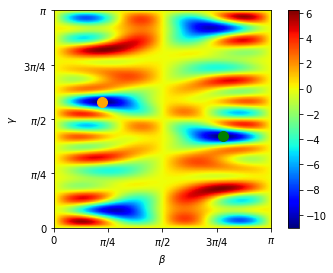

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def heatmap(vals, colors):
    fig, ax = plt.subplots(1,1)

    img = ax.imshow(vals, cmap=colors,extent=[0, np.pi,np.pi,0])
    
    ax.invert_yaxis()

    x_label_list = [r"0",r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$",r"$\pi$"]

    ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi])

    ax.set_xticklabels(x_label_list)

    ax.set_yticks([0, np.pi/4, np.pi/2, 3*np.pi/4,np.pi])

    ax.set_yticklabels(x_label_list)

    plt.xlabel(r"$\beta$")

    plt.ylabel(r"$\gamma$")

    fig.colorbar(img)

heatmap(Z, 'jet')
plt.scatter(bg_pairs[0][0], bg_pairs[0][1], s=100, color='orange')
plt.scatter(bg_pairs[1][0],bg_pairs[1][1], s=100, color='green')
plt.show()

See how the two minima $-11.023612333401879$ occur at $(\beta,\gamma) = (0.6957889769695516, 1.8132682430115585) \approx (0.221\pi,0.577\pi)$, and at $(\beta,\gamma) = (2.445803676620242, 1.3283244105782348) \approx (0.778\pi,0.423\pi)$. The minima are marked by orange, and green dots respectively in the plot.

Alternatively we can make a 3D plot of the expectation value landscape.

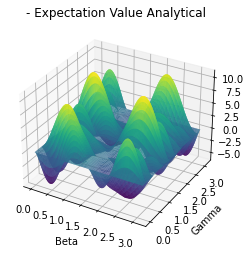

In [7]:
# Define the linear space to make a meshgrid with the number of points used.

n_linear=150

def threeplot(vals, colors, n_x):
    x = np.linspace(0, np.pi, n_linear)
    y = np.linspace(0, np.pi, n_linear)

    X, Y = np.meshgrid(x, y)

    # Make a 3D plot
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, vals, rstride=1, cstride=1,
                     cmap=colors, edgecolor='none')

    ax.set_title('- Expectation Value Analytical')

    plt.xlabel('Beta')
    plt.ylabel('Gamma')
    plt.show(fig)
    
threeplot(-Z, 'viridis', n_linear)

## 3. Analytical determination of angles functionality in Google results <a name="google"></a>

This section will show how we can replicate the google result of arxiv:2004.04197 for QAOA with $p=1$ using our functionality and then go far beyond that.

In the paper they study three differen types of problems instances: hardware grid, three-regular, and Sherrington-Kirkpatrick. Using Cirq we generate a single problem instance for each type, we define them below.


In [8]:
dict_hg={(0, 2): 1, (1, 2): 1, (2, 3): 1, (2, 6): 1, (1, 5): -1, (3, 7): -1, (5, 6): 1, (6, 7): 1, (6, 10): 1, (4, 5): 1, (5, 9): -1, (9, 10): -1, (7, 8): 1, (7, 11): 1, (10, 11): 1, (10, 14): -1, (8, 12): 1, (11, 12): -1, (11, 15): -1, (14, 15): -1, (12, 13): -1, (12, 16): 1, (15, 16): -1, (15, 19): 1, (13, 17): 1, (16, 17): 1, (16, 20): 1, (19, 20): 1, (17, 18): -1, (17, 21): 1, (20, 21): 1, (20, 22): 1}

dict_3reg={(11, 16): 1, (1, 11): 1, (11, 19): 1, (8, 16): 1, (14, 16): 1, (3, 15): 1, (3, 21): 1, (3, 4): 1, (6, 15): 1, (15, 17): 1, (20, 21): 1, (17, 21): 1, (2, 12): 1, (1, 2): 1, (2, 13): 1, (8, 12): 1, (9, 12): 1, (9, 18): 1, (9, 20): 1, (0, 18): 1, (13, 18): 1, (1, 10): 1, (19, 20): 1, (0, 19): 1, (8, 14): 1, (4, 14): 1, (6, 7): 1, (0, 6): 1, (5, 7): 1, (7, 17): 1, (10, 13): 1, (5, 10): 1, (4, 5): 1}

dict_sk={(0, 1): 1, (0, 2): 1, (0, 3): 1, (0, 4): 1, (0, 5): -1, (0, 6): -1, (0, 7): -1, (0, 8): -1, (0, 9): -1, (0, 10): -1, (1, 2): -1, (1, 3): -1, (1, 4): -1, (1, 5): 1, (1, 6): -1, (1, 7): -1, (1, 8): 1, (1, 9): 1, (1, 10): -1, (2, 3): -1, (2, 4): 1, (2, 5): 1, (2, 6): -1, (2, 7): -1, (2, 8): 1, (2, 9): 1, (2, 10): 1, (3, 4): 1, (3, 5): -1, (3, 6): -1, (3, 7): 1, (3, 8): -1, (3, 9): 1, (3, 10): -1, (4, 5): -1, (4, 6): 1, (4, 7): 1, (4, 8): 1, (4, 9): -1, (4, 10): 1, (5, 6): -1, (5, 7): -1, (5, 8): -1, (5, 9): -1, (5, 10): 1, (6, 7): 1, (6, 8): 1, (6, 9): 1, (6, 10): -1, (7, 8): -1, (7, 9): 1, (7, 10): -1, (8, 9): -1, (8, 10): -1, (9, 10): 1}

We can now plot the expectation value landscapes and see that they are equal to those shown in Fig. 3 of the paper.

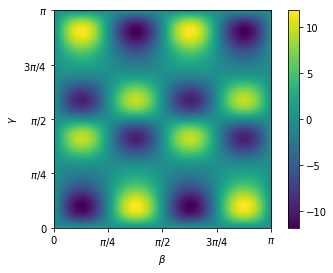

In [9]:
expectations, bg_pairs, Z = \
                forge.optimization.find_optimal_qaoa_angles(dict_hg,
                                               num_evals=150,
                                               num_min_vals=10,
                                               fastmath_flag_in=True,
                                               precision=30)

heatmap(-Z, 'viridis')

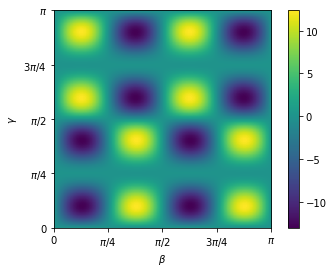

In [10]:
expectations, bg_pairs, Z = \
                forge.optimization.find_optimal_qaoa_angles(dict_3reg,
                                               num_evals=150,
                                               num_min_vals=10,
                                               fastmath_flag_in=True,
                                               precision=30)

heatmap(-Z, 'viridis')

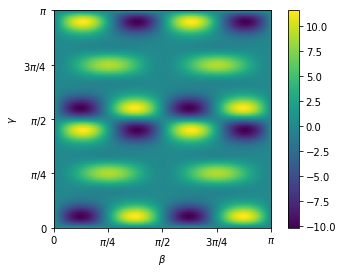

In [11]:
expectations, bg_pairs, Z = \
                forge.optimization.find_optimal_qaoa_angles(dict_sk,
                                               num_evals=150,
                                               num_min_vals=10,
                                               fastmath_flag_in=True,
                                               precision=30)

heatmap(-Z, 'viridis')

Our function is, however, not limited to this types of problems. Next, we will generate the expectation value landscape of a 3-regular graph with 100 qubits and external fields.

The first step is to write a function that generates the cost function

In [12]:
import networkx as nx
import random

def generate_rand_reg(d, n):
    '''Generate a random d regular graph with n nodes with a general hamiltonian'''
    G = nx.random_regular_graph(d, n, seed=999)
    random.seed(999)
    n_int=1
    cost_dictionary = {}
    for elm in list(G.nodes()):
        cost_dictionary[elm, ] =random.randrange(-n_int, n_int+1,2*n_int)
    edges = [sorted(elm) for elm in list(G.edges())]
    for elm in edges:
        cost_dictionary[elm[0], elm[1]] = random.randrange(-n_int, n_int+1,2*n_int)
    return cost_dictionary, G

Q, G = generate_rand_reg(3, 100)


print('Q:')
pprint.pprint(Q)

Q:
{(0,): -1,
 (0, 41): -1,
 (0, 68): 1,
 (0, 75): -1,
 (1,): -1,
 (1, 13): -1,
 (1, 17): -1,
 (1, 36): -1,
 (2,): -1,
 (2, 49): -1,
 (2, 56): -1,
 (2, 84): -1,
 (3,): -1,
 (3, 11): -1,
 (3, 16): -1,
 (3, 35): 1,
 (4,): -1,
 (4, 34): -1,
 (4, 48): -1,
 (4, 78): 1,
 (5,): 1,
 (5, 34): -1,
 (5, 38): 1,
 (5, 63): -1,
 (6,): -1,
 (6, 18): -1,
 (6, 95): 1,
 (6, 99): -1,
 (7,): 1,
 (7, 28): 1,
 (7, 39): -1,
 (7, 81): 1,
 (8,): -1,
 (8, 52): -1,
 (8, 74): -1,
 (8, 90): -1,
 (9,): 1,
 (9, 55): 1,
 (9, 62): -1,
 (9, 94): -1,
 (10,): 1,
 (10, 37): 1,
 (10, 42): -1,
 (10, 66): -1,
 (11,): -1,
 (11, 25): 1,
 (11, 43): 1,
 (12,): -1,
 (12, 38): 1,
 (12, 91): 1,
 (12, 95): 1,
 (13,): 1,
 (13, 58): -1,
 (13, 70): 1,
 (14,): 1,
 (14, 39): 1,
 (14, 76): 1,
 (14, 78): 1,
 (15,): -1,
 (15, 42): -1,
 (15, 50): -1,
 (15, 70): 1,
 (16,): 1,
 (16, 21): 1,
 (16, 77): 1,
 (17,): 1,
 (17, 48): 1,
 (17, 71): 1,
 (18,): 1,
 (18, 31): 1,
 (18, 65): -1,
 (19,): -1,
 (19, 20): 1,
 (19, 24): -1,
 (19, 63): -1,
 (20,)

Then we can generate the landscape and find the optimal angles.

Expectations:
[-71.61171929099078,
 -71.61171929099078,
 -71.55773677282104,
 -71.55773677282102,
 -66.98192628617771,
 -66.98192628617768,
 -66.92247629037169,
 -66.92247629037169,
 -66.80099906093564,
 -66.80099906093561]
BG pairs:
[[0.44277480352607823, 1.3072398961246119],
 [2.698817850063715, 1.8343527574651812],
 [2.698817850063715, 0.25301417344347327],
 [0.44277480352607823, 2.88857848014632],
 [2.8042404223318287, 1.8343527574651812],
 [0.3373522312579644, 1.3072398961246119],
 [0.3373522312579644, 2.88857848014632],
 [2.8042404223318287, 0.25301417344347327],
 [2.5933952777956013, 1.8343527574651812],
 [0.5481973757941921, 1.3072398961246119]]


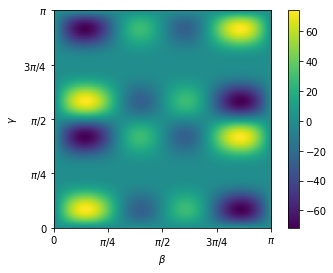

In [13]:
expectations, bg_pairs, Z = \
                forge.optimization.find_optimal_qaoa_angles(Q,
                                               num_evals=150,
                                               num_min_vals=10,
                                               fastmath_flag_in=True,
                                               precision=30)

heatmap(Z, 'viridis')
print('Expectations:')
pprint.pprint(expectations)
print('BG pairs:')
pprint.pprint(bg_pairs)

<br><a href="#top">Back to Table of Contents</a>